In [ ]:
#Theoretical Questions:

In [ ]:
#Q1. What is unsupervised learning in the context of machine learning?
#Ans: Unsupervised learning is a type of machine learning where algorithms learn from data that has not been labeled or categorized. Its goal is to find hidden patterns or structures within the input data without human intervention.

In [ ]:
#Q2. How does K-Means clustering algorithm work?
#Ans: K-Means partitions data into K distinct clusters by iteratively assigning data points to the nearest cluster centroid and then re-calculating the centroids as the mean of all points assigned to that cluster. This process minimizes the within-cluster sum of squares.

In [ ]:
#Q3. Explain the concept of a dendrogram in hierarchical clustering.
#Ans: A dendrogram is a tree-like diagram that visually represents the hierarchical relationships between clusters formed during hierarchical clustering. It shows the sequence of merges or splits and the distance at which they occur.

In [ ]:
#Q4.What is the main difference between K-Means and Hierarchical Clustering?
#Ans: K-Means creates a flat partitioning of data into a predetermined number of clusters, while Hierarchical Clustering builds a tree of clusters, allowing for exploration of relationships at different levels of granularity without specifying 'K' beforehand.

In [ ]:
#Q5. What are the advantages of DBSCAN over K-Means?
#Ans: DBSCAN can discover clusters of arbitrary shapes and does not require pre-specifying the number of clusters. It is also robust to outliers, labeling them as noise rather than forcing them into a cluster.

In [ ]:
#Q6. When would you use Silhouette Score in clustering?
#Ans: Use Silhouette Score to evaluate clustering quality by measuring how well-separated and compact clusters are, especially without ground truth.

In [ ]:
#Q7. What are the limitations of Hierarchical Clustering?
#Ans: It's computationally expensive for large datasets, sensitive to noise, and merges/splits are irreversible.

In [ ]:
#Q8. Why is feature scaling important in clustering algorithms like K-Means?
#Ans: Feature scaling ensures all features contribute equally to distance calculations, preventing bias from varying value ranges.

In [ ]:
#Q9. How does DBSCAN identify noise points?
#Ans: DBSCAN identifies noise points as those neither core nor border points, lacking sufficient neighbors within ϵ.

In [ ]:
#Q10. Define inertia in the context of K-Means.
#Ans: Inertia is the sum of squared distances between each point and its cluster's centroid, measuring within-cluster compactness.

In [ ]:
#Q11. What is the elbow method in K-Means clustering?
#Ans: The elbow method plots inertia against K to find an optimal K where the decrease in inertia significantly slows down.

In [ ]:
#Q12. Describe the concept of "density" in DBSCAN.
#Ans: Density in DBSCAN refers to the concentration of data points within a given radius, defining dense regions as clusters.

In [ ]:
#Q13. Can hierarchical clustering be used on categorical data?
#Ans: Yes, by converting categorical data to numerical forms or using specialized categorical distance metrics.

In [ ]:
#Q14. What does a negative Silhouette Score indicate?
#Ans: A negative Silhouette Score suggests a point might be in the wrong cluster, being closer to a different cluster.

In [ ]:
#Q15. Explain the term "linkage criteria" in hierarchical clustering.
#Ans: Linkage criteria define how the distance between two clusters is calculated during hierarchical clustering (e.g., single, complete, average).

In [ ]:
#Q16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
#Ans: K-Means assumes spherical clusters of similar size and density, leading to poor performance on irregular or density-varying data.

In [ ]:
#Q17. What are the core parameters in DBSCAN, and how do they influence clustering?
#Ans: The core parameters are ϵ (neighborhood radius) and MinPts (minimum points), which define cluster density and shape.

In [ ]:
#Q18. How does K-Means++ improve upon standard K-Means initialization?
#Ans: K-Means++ selects initial centroids that are well-spread, reducing the chance of converging to suboptimal local minima.

In [ ]:
#Q19. What is agglomerative clustering?
#Ans: Agglomerative clustering is a bottom-up hierarchical method that starts with individual points as clusters and iteratively merges the closest ones.

In [ ]:
#Q20. What makes Silhouette Score a better metric than just inertia for model evaluation?
#Ans: Silhouette Score considers both cluster compactness and separation, providing a more comprehensive evaluation than inertia alone.

In [ ]:
#Practical Questions:

K-Means clustering applied and visualization saved to kmeans_clustering_synthetic_data.png


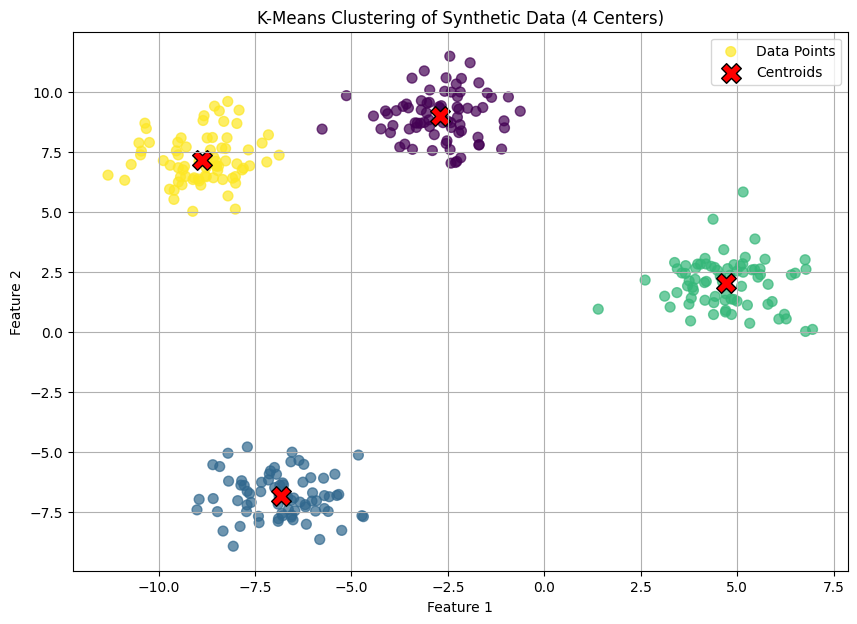

In [1]:
#Q21.Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data
n_samples = 300
n_features = 2
n_centers = 4
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_centers, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=n_centers, random_state=42, n_init=10) # Set n_init explicitly
kmeans.fit(X)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 3. Visualize using a scatter plot
plt.figure(figsize=(10, 7))

# Scatter plot of data points, colored by cluster label
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis', alpha=0.7, label='Data Points')

# Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', edgecolors='black', label='Centroids')

plt.title('K-Means Clustering of Synthetic Data (4 Centers)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.savefig('kmeans_clustering_synthetic_data.png')
print("K-Means clustering applied and visualization saved to kmeans_clustering_synthetic_data.png")

In [2]:
#Q22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # Features of the Iris dataset
y_true = iris.target # True labels (for reference, not used in clustering)

# 2. Use Agglomerative Clustering to group the data into 3 clusters
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
predicted_labels = agg_clustering.fit_predict(X)

# 3. Display the first 10 predicted labels
print("First 10 predicted cluster labels:")
print(predicted_labels[:10])

# Optional: Display all unique predicted labels and their counts
# print("\nAll unique predicted labels and their counts:")
# print(pd.Series(predicted_labels).value_counts())

First 10 predicted cluster labels:
[1 1 1 1 1 1 1 1 1 1]


DBSCAN clustering applied and visualization with outliers highlighted saved to dbscan_moons_outliers.png


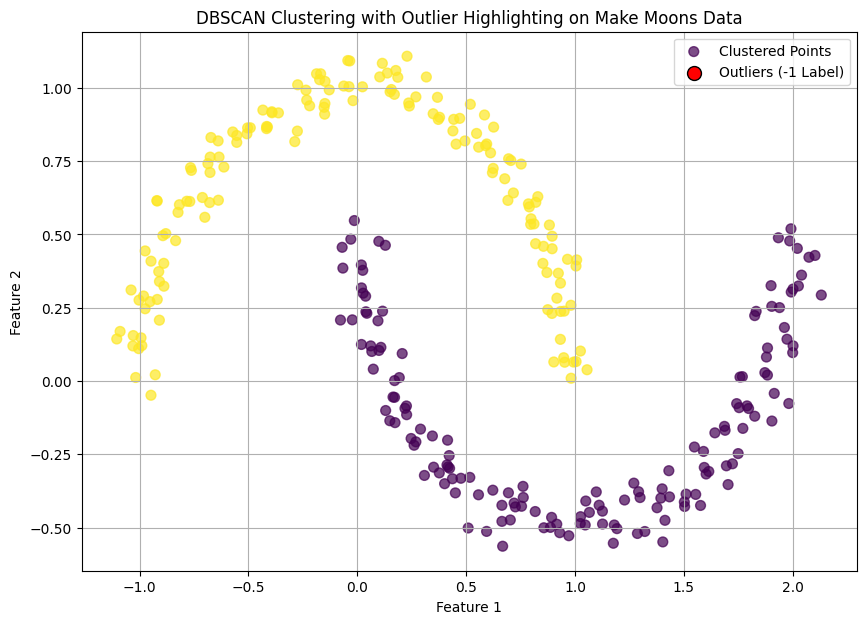

In [3]:
#Q23.  Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate synthetic 'moons' data
n_samples = 300
X, y = make_moons(n_samples=n_samples, noise=0.05, random_state=42)

# 2. Apply DBSCAN
# You might need to tune eps and min_samples for different datasets or noise levels.
# For make_moons with noise=0.05, these values often work well.
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

# 3. Highlight outliers in the plot
# Outliers (noise points) in DBSCAN are assigned a label of -1.
outliers_mask = (clusters == -1)
clustered_mask = (clusters != -1)

plt.figure(figsize=(10, 7))

# Plot clustered points
plt.scatter(X[clustered_mask, 0], X[clustered_mask, 1], c=clusters[clustered_mask],
            s=50, cmap='viridis', alpha=0.7, label='Clustered Points')

# Highlight outliers
plt.scatter(X[outliers_mask, 0], X[outliers_mask, 1], c='red', s=100, marker='o',
            edgecolors='black', label='Outliers (-1 Label)')

plt.title('DBSCAN Clustering with Outlier Highlighting on Make Moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.savefig('dbscan_moons_outliers.png')
print("DBSCAN clustering applied and visualization with outliers highlighted saved to dbscan_moons_outliers.png")

In [4]:
#Q24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data  # Features of the Wine dataset
y_true = wine.target # True labels (for reference, not used in clustering itself)

# 2. Standardize the features
# Standardizing ensures that all features contribute equally to the distance calculation,
# which is important for algorithms like K-Means that are based on distances.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply K-Means clustering
# The Wine dataset has 3 known classes, so it's a good starting point to aim for 3 clusters.
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly to suppress warning
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_ # This array contains the cluster label for each sample

# 4. Print the size of each cluster
print("Size of each cluster:")
for i in range(n_clusters):
    # Count how many samples belong to the current cluster 'i'
    cluster_size = np.sum(cluster_labels == i)
    print(f"Cluster {i}: {cluster_size} samples")

# Optional: You can also use pandas value_counts for a quick summary
# print("\nCluster distribution (using pandas value_counts):")
# print(pd.Series(cluster_labels).value_counts().sort_index())

Size of each cluster:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


DBSCAN clustering applied and visualization saved to dbscan_circles_clustering.png


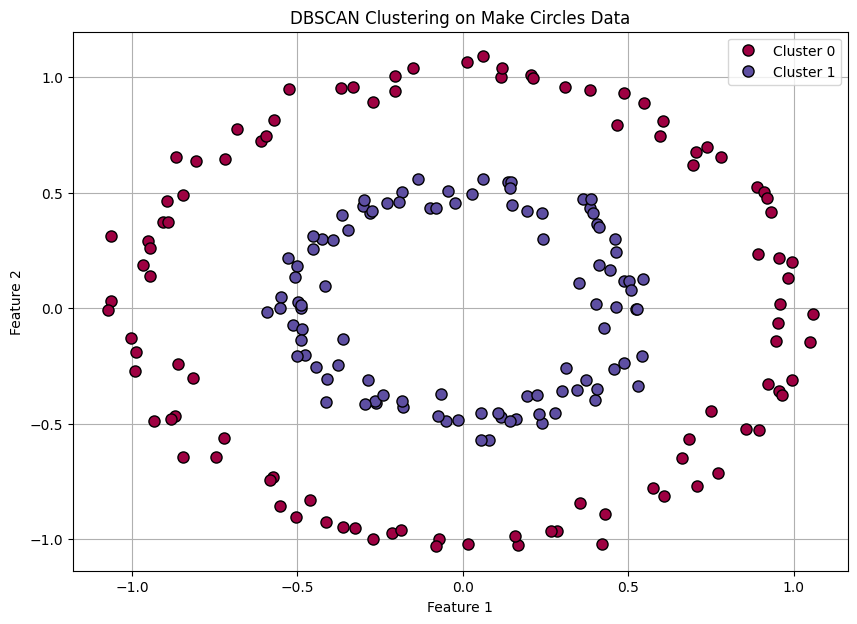

In [5]:
#Q25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate synthetic 'circles' data
n_samples = 200
X, y = make_circles(n_samples=n_samples, noise=0.05, factor=0.5, random_state=42)

# 2. Apply DBSCAN
# Tuning eps and min_samples is crucial for DBSCAN, especially for nested shapes like circles.
# These values are chosen to work well with make_circles(noise=0.05, factor=0.5)
dbscan = DBSCAN(eps=0.2, min_samples=5) # Adjust eps/min_samples based on data density/noise
clusters = dbscan.fit_predict(X)

# 3. Plot the result, highlighting outliers
plt.figure(figsize=(10, 7))

# Get unique cluster labels, excluding -1 (noise)
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot each cluster
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1] # RGB A

    class_member_mask = (clusters == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8 if k != -1 else 6,
             label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clustering on Make Circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.savefig('dbscan_circles_clustering.png')
print("DBSCAN clustering applied and visualization saved to dbscan_circles_clustering.png")

In [6]:
#Q26.Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data  # Features of the Breast Cancer dataset
y_true = breast_cancer.target # True labels (0 for malignant, 1 for benign - for reference)

# 2. Apply MinMaxScaler
# MinMaxScaler scales features to a given range, typically [0, 1].
# This is useful when algorithms like K-Means are sensitive to the scale of features.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3. Use K-Means with 2 clusters
# The Breast Cancer dataset inherently has two classes (malignant and benign),
# so 2 clusters is a natural choice for K-Means here.
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
kmeans.fit(X_scaled)

# 4. Output the cluster centroids
print("Cluster Centroids (after MinMaxScaler):")
# The cluster_centers_ attribute holds the coordinates of each cluster center.
# Each row represents a centroid, and each column corresponds to a feature.
print(kmeans.cluster_centers_)

# Optional: Print the shape of the centroids to see number of centroids and features
print(f"\nShape of centroids array: {kmeans.cluster_centers_.shape}")
print(f"Number of features in the dataset: {X.shape[1]}")

Cluster Centroids (after MinMaxScaler):
[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]

Shape of centroids array: (2, 30)
Number of features in the dataset: 30


DBSCAN clustering applied to make_blobs with varying standard deviations and visualization saved to dbscan_blobs_varying_std.png


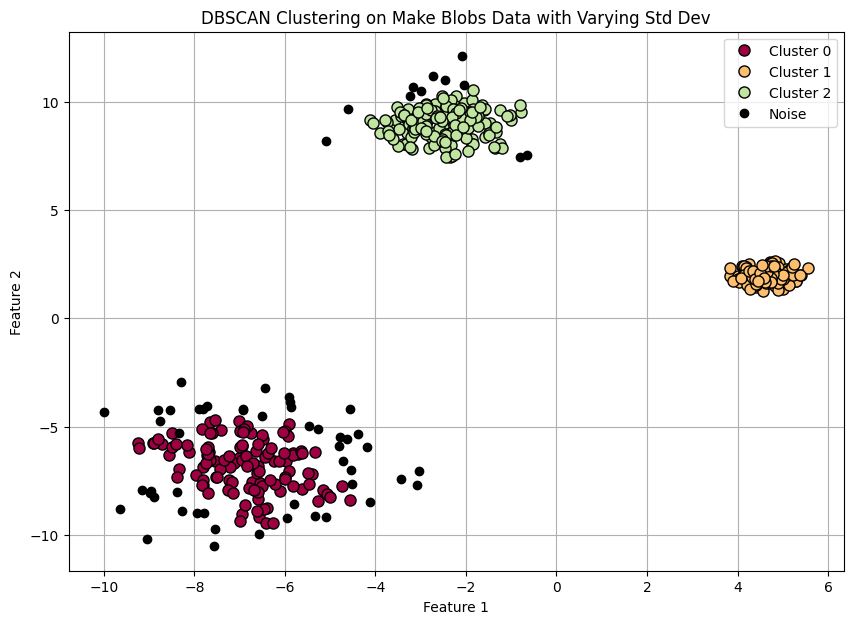

In [7]:
#Q27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Generate synthetic data with varying cluster standard deviations
n_samples = 500
n_features = 2
centers = 3 # Number of distinct centers
cluster_std = [0.8, 0.3, 1.5] # Varying standard deviations for each cluster

X, y = make_blobs(n_samples=n_samples, n_features=n_features,
                  centers=centers, cluster_std=cluster_std, random_state=42)

# 2. Apply DBSCAN
# DBSCAN parameters (eps, min_samples) might need tuning based on the data's density.
# For clusters with varying std, one eps might not perfectly capture all densities.
# We choose parameters that aim to capture the denser parts of the data.
dbscan = DBSCAN(eps=0.5, min_samples=5) # Example parameters, may require tuning
clusters = dbscan.fit_predict(X)

# 3. Plot the result, highlighting outliers
plt.figure(figsize=(10, 7))

# Get unique cluster labels, excluding -1 (noise)
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Plot each cluster
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise points
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8 if k != -1 else 6,
             label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clustering on Make Blobs Data with Varying Std Dev')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.savefig('dbscan_blobs_varying_std.png')
print("DBSCAN clustering applied to make_blobs with varying standard deviations and visualization saved to dbscan_blobs_varying_std.png")

Original data shape: (1797, 64)
Reduced data shape: (1797, 2)
Digits dataset loaded, PCA applied, K-Means clustered, and visualization saved to kmeans_digits_pca_clustering.png


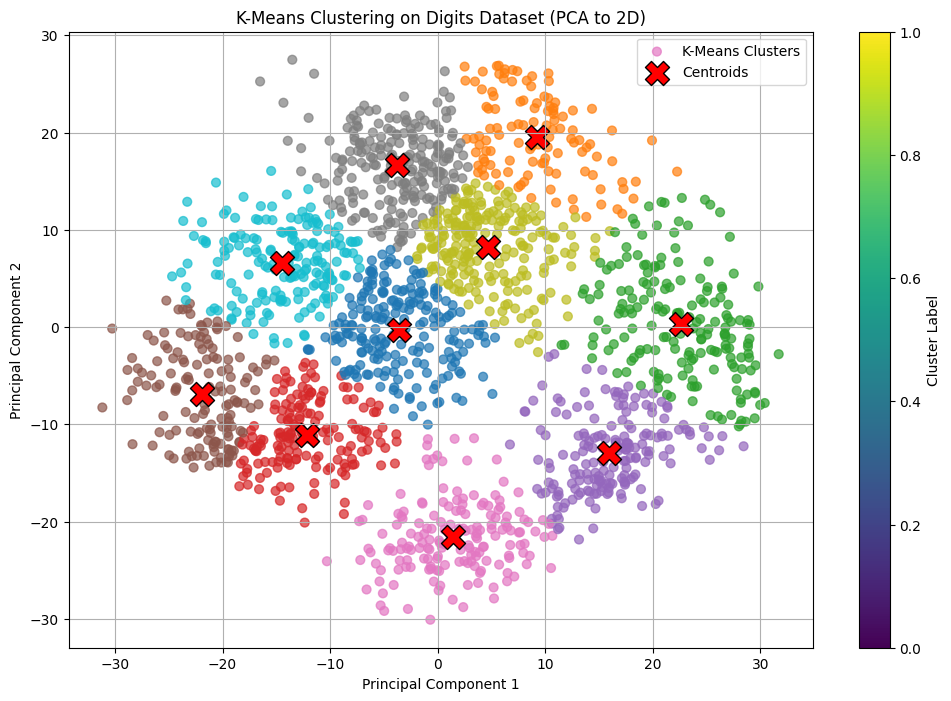

In [8]:
#Q28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data  # The image data (64 features per image)
y_true = digits.target # The actual digit (0-9) - for reference/comparison

print(f"Original data shape: {X.shape}") # (1797 samples, 64 features)

# 2. Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

print(f"Reduced data shape: {X_pca.shape}") # (1797 samples, 2 features)

# 3. Apply K-Means clustering
# The Digits dataset has 10 classes (digits 0-9), so we'll use 10 clusters.
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 4. Visualize clusters from K-Means
plt.figure(figsize=(12, 8))

# Scatter plot of data points, colored by K-Means cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='tab10', s=40, alpha=0.7, label='K-Means Clusters')

# Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', edgecolors='black', label='Centroids')

plt.title('K-Means Clustering on Digits Dataset (PCA to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.grid(True)
plt.savefig('kmeans_digits_pca_clustering.png')
print("Digits dataset loaded, PCA applied, K-Means clustered, and visualization saved to kmeans_digits_pca_clustering.png")

In [ ]:
#Q29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart


Dendrogram for Iris dataset with average linkage saved to iris_dendrogram_average_linkage.png


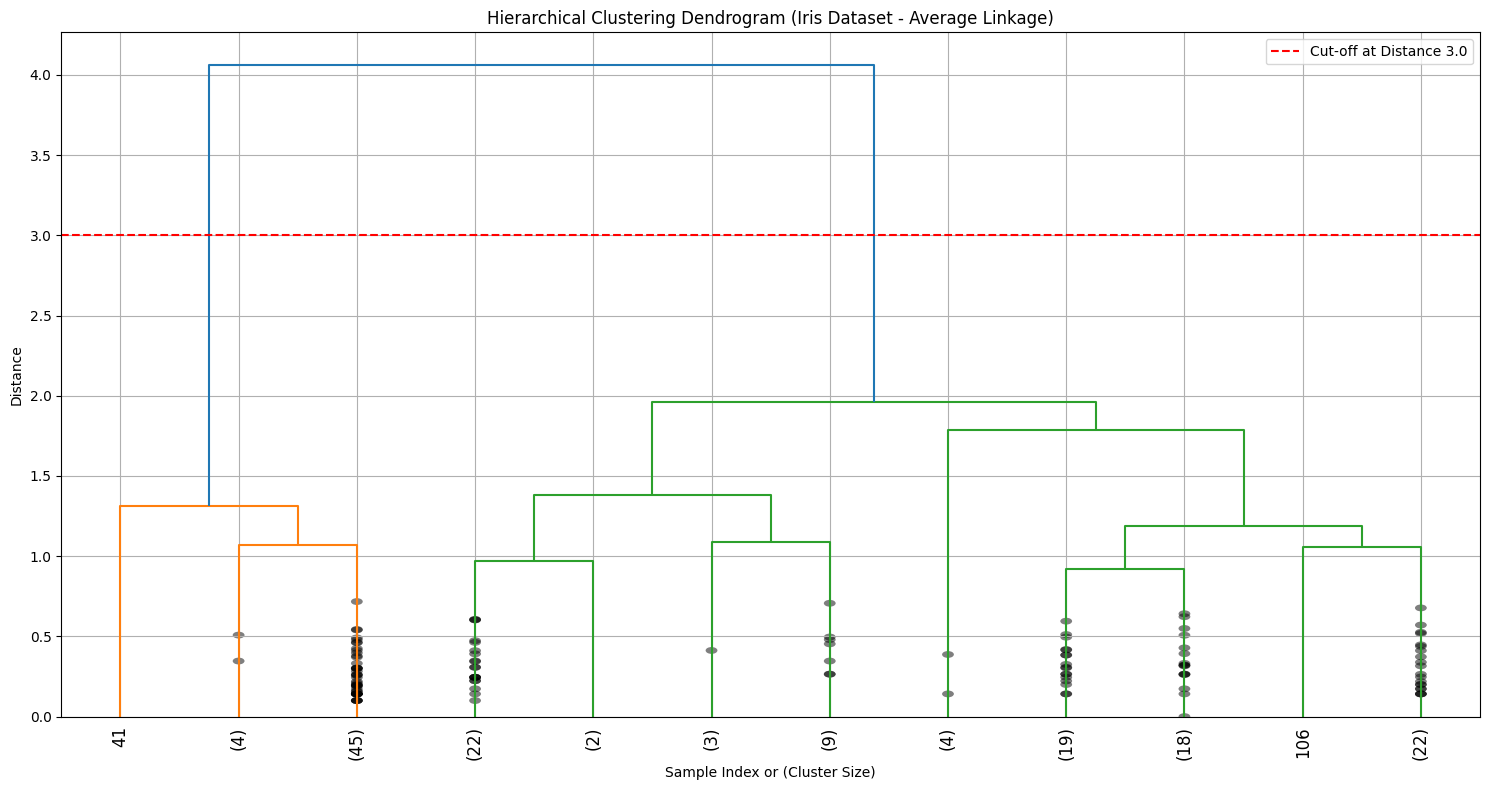

In [9]:
#Q30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # Features of the Iris dataset
# y_true = iris.target # True labels (for reference, not used in clustering)

# 2. Perform hierarchical clustering to compute the linkage matrix
# We use the 'linkage' function from scipy.cluster.hierarchy to compute
# the hierarchical clustering.
# 'method="average"' means that the distance between two clusters is the
# average of the distances between all observations in the two clusters.
Z = linkage(X, method='average')

# 3. Plot a dendrogram
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset - Average Linkage)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')

# The dendrogram function plots the hierarchical clustering as a tree.
# We set truncate_mode='lastp' and p=12 to show only the last 12 merges,
# making the dendrogram more readable for larger datasets.
# You can remove these parameters to see the full dendrogram.
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show only the last 12 merged clusters
    show_leaf_counts=True,  # show the number of original observations in the leaf nodes
    leaf_rotation=90.,      # rotates the x-axis labels
    leaf_font_size=12.,     # font size for the x-axis labels
    show_contracted=True,   # to get a feel for how many original observations in the leaf node
)
plt.grid(True)
plt.axhline(y=3.0, color='r', linestyle='--', label='Cut-off at Distance 3.0') # Example cut-off
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('iris_dendrogram_average_linkage.png')
print("Dendrogram for Iris dataset with average linkage saved to iris_dendrogram_average_linkage.png")

K-Means clustering with decision boundaries on overlapping blobs saved to kmeans_overlapping_blobs_decision_boundaries.png


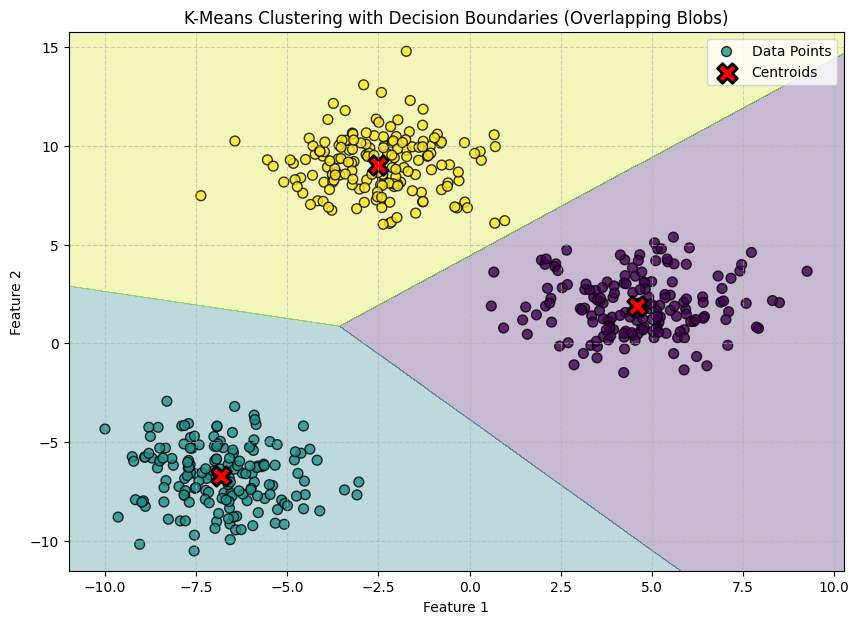

In [10]:
#Q31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data with overlapping clusters
n_samples = 500
n_features = 2
n_centers = 3  # Number of clusters
# Increase cluster_std to create overlap between clusters
X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=1.5, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=n_centers, random_state=42, n_init=10) # Set n_init explicitly
kmeans.fit(X)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 3. Visualize with decision boundaries

# Create a meshgrid for plotting the decision boundaries
# Determine the range of the features to create a suitable grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict cluster labels for each point in the meshgrid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))

# Plot the decision boundaries (filled regions)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis', edgecolors='k', alpha=0.8, label='Data Points')

# Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', edgecolors='black', linewidth=2, label='Centroids')

plt.title('K-Means Clustering with Decision Boundaries (Overlapping Blobs)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('kmeans_overlapping_blobs_decision_boundaries.png')
print("K-Means clustering with decision boundaries on overlapping blobs saved to kmeans_overlapping_blobs_decision_boundaries.png")

Original data shape: (1797, 64)
Applying t-SNE for dimensionality reduction (this may take a moment)...


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE finished in 6.99 seconds.
Reduced data shape (t-SNE): (1797, 2)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6088\3916461081.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = [plt.cm.get_cmap('tab20', len(unique_labels))(each) for each in range(len(unique_labels))]


Digits dataset loaded, t-SNE applied, DBSCAN clustered, and visualization saved to dbscan_digits_tsne_clustering.png


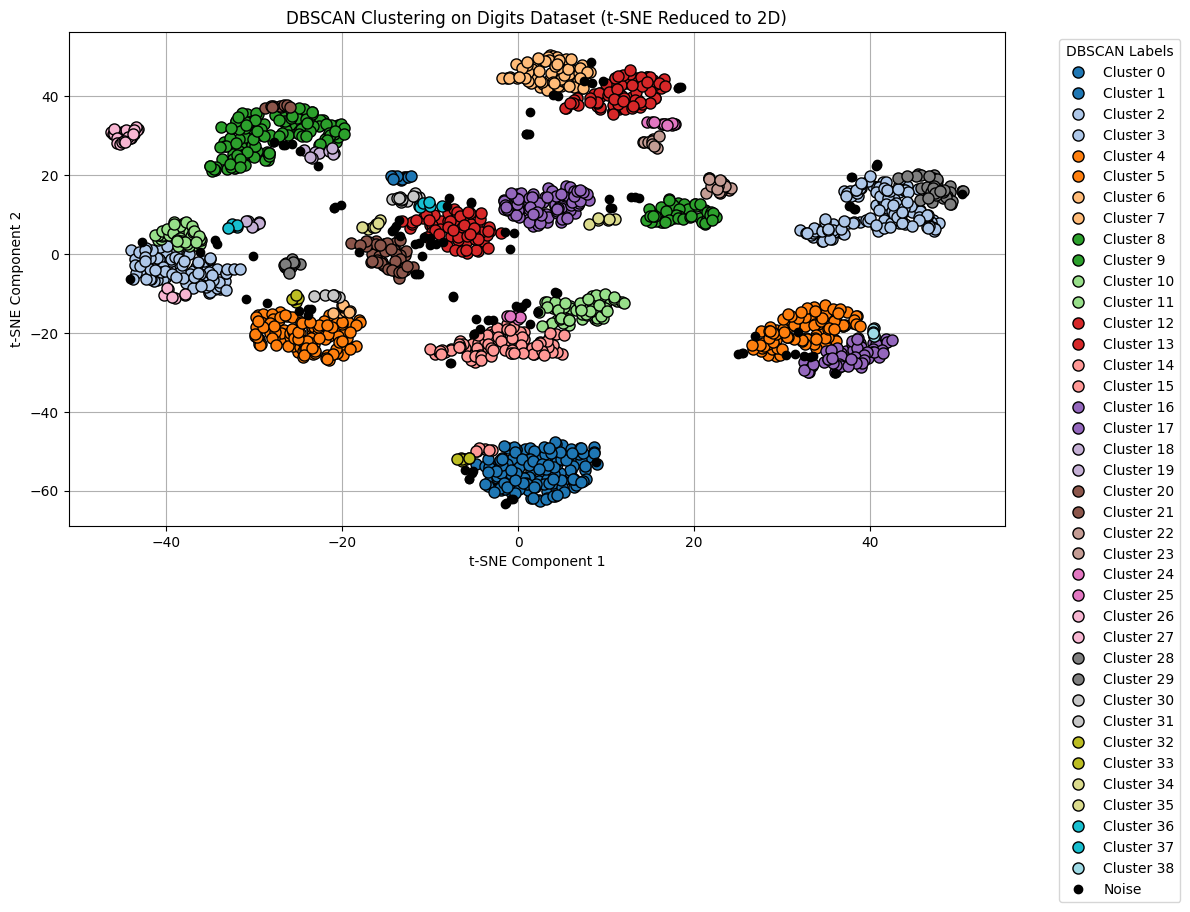

In [13]:
#Q32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import numpy as np
import time

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data  # The image data (64 features per image)
y_true = digits.target # The actual digit (0-9) - for reference/comparison

print(f"Original data shape: {X.shape}") # (1797 samples, 64 features)

# 2. Reduce dimensionality to 2D using t-SNE
print("Applying t-SNE for dimensionality reduction (this may take a moment)...")
start_time = time.time()
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)
end_time = time.time()
print(f"t-SNE finished in {end_time - start_time:.2f} seconds.")

print(f"Reduced data shape (t-SNE): {X_tsne.shape}") # (1797 samples, 2 features)

# 3. Apply DBSCAN clustering
# Note: DBSCAN parameters (eps, min_samples) are crucial and often require tuning
# for t-SNE embeddings, as t-SNE distorts global distances.
# These are example values that might work for the Digits dataset after t-SNE.
dbscan = DBSCAN(eps=1.5, min_samples=5) # Adjust these parameters as needed!
clusters = dbscan.fit_predict(X_tsne)

# 4. Visualize the results
plt.figure(figsize=(12, 8))

# Get unique cluster labels, excluding -1 (noise)
unique_labels = set(clusters)
# Using a colormap that can handle many distinct colors
colors = [plt.cm.get_cmap('tab20', len(unique_labels))(each) for each in range(len(unique_labels))]
# If more than 20 unique labels, tab20b or tab20c can be used, or a continuous colormap like 'viridis'

# Plot each cluster
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise points
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)

    xy = X_tsne[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8 if k != -1 else 6,
             label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clustering on Digits Dataset (t-SNE Reduced to 2D)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='DBSCAN Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('dbscan_digits_tsne_clustering.png')
print("Digits dataset loaded, t-SNE applied, DBSCAN clustered, and visualization saved to dbscan_digits_tsne_clustering.png")

Agglomerative Clustering with complete linkage applied and visualization saved to agg_clustering_complete_linkage_blobs.png


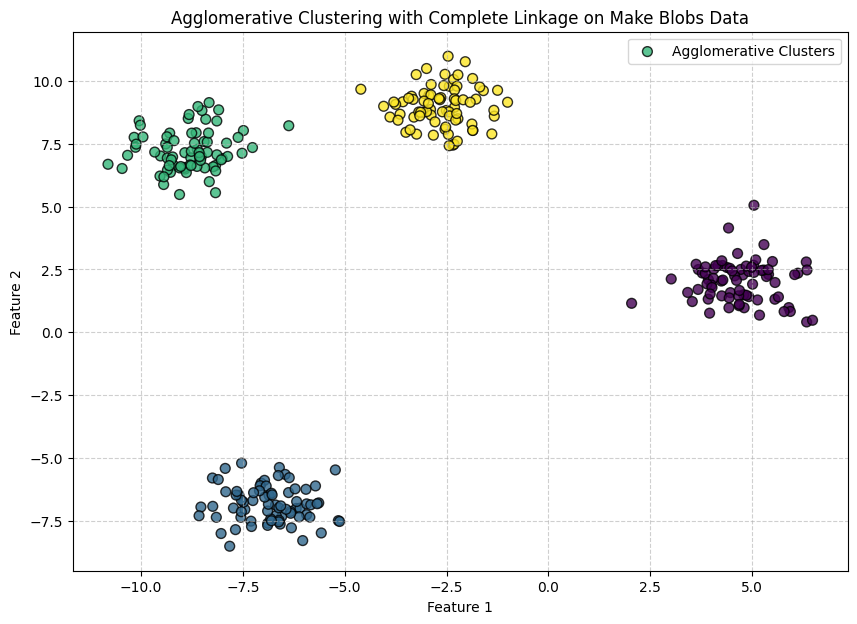

In [14]:
#Q33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# 1. Generate synthetic data
n_samples = 300
n_features = 2
n_centers = 4 # Let's create 4 distinct blobs
X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=0.8, random_state=42)

# 2. Apply Agglomerative Clustering with complete linkage
# We aim for the same number of clusters as generated (4 in this case)
agg_clustering = AgglomerativeClustering(n_clusters=n_centers, linkage='complete')
predicted_labels = agg_clustering.fit_predict(X)

# 3. Plot the result
plt.figure(figsize=(10, 7))

# Scatter plot of data points, colored by their assigned cluster label
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, s=50, cmap='viridis', alpha=0.8,
            edgecolors='k', label='Agglomerative Clusters')

plt.title('Agglomerative Clustering with Complete Linkage on Make Blobs Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('agg_clustering_complete_linkage_blobs.png')
print("Agglomerative Clustering with complete linkage applied and visualization saved to agg_clustering_complete_linkage_blobs.png")

Calculating inertia for different K values:
K = 2: Inertia = 77943099.88
K = 3: Inertia = 47264841.92
K = 4: Inertia = 29226541.65
K = 5: Inertia = 20539877.62
K = 6: Inertia = 16573867.02
Line plot of inertia values saved to kmeans_inertia_breast_cancer.png


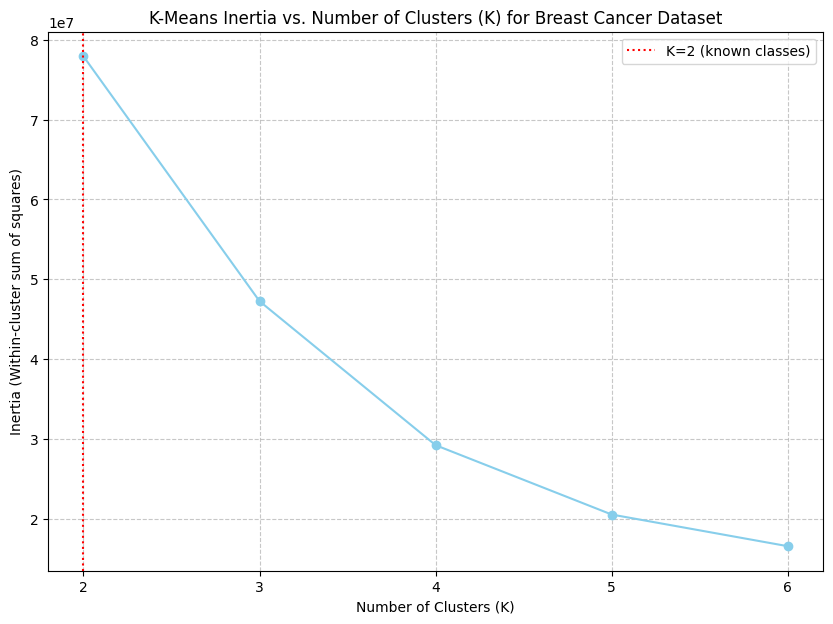

In [15]:
#Q34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import numpy as np

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data  # Features of the Breast Cancer dataset

# It's often good practice to scale data for K-Means, though not explicitly requested
# for inertia comparison alone, it usually leads to better clustering.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# Use X_scaled instead of X below if you uncomment scaling.
X_to_cluster = X # Using raw data as scaling wasn't explicitly asked for this step's output

# 2. Initialize lists to store K values and their corresponding inertia
k_values = range(2, 7) # K from 2 to 6
inertia_values = []

# 3. Iterate through K values, apply K-Means, and collect inertia
print("Calculating inertia for different K values:")
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(X_to_cluster)
    inertia_values.append(kmeans.inertia_)
    print(f"K = {k}: Inertia = {kmeans.inertia_:.2f}")

# 4. Show results in a line plot (Elbow Method plot)
plt.figure(figsize=(10, 7))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='skyblue')

plt.title('K-Means Inertia vs. Number of Clusters (K) for Breast Cancer Dataset')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(k_values) # Ensure x-axis ticks are only for our K values
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=2, color='r', linestyle=':', label='K=2 (known classes)') # Highlight K=2
plt.legend()
plt.savefig('kmeans_inertia_breast_cancer.png')
print("Line plot of inertia values saved to kmeans_inertia_breast_cancer.png")

Agglomerative Clustering with single linkage applied and visualization saved to agg_clustering_single_linkage_circles.png


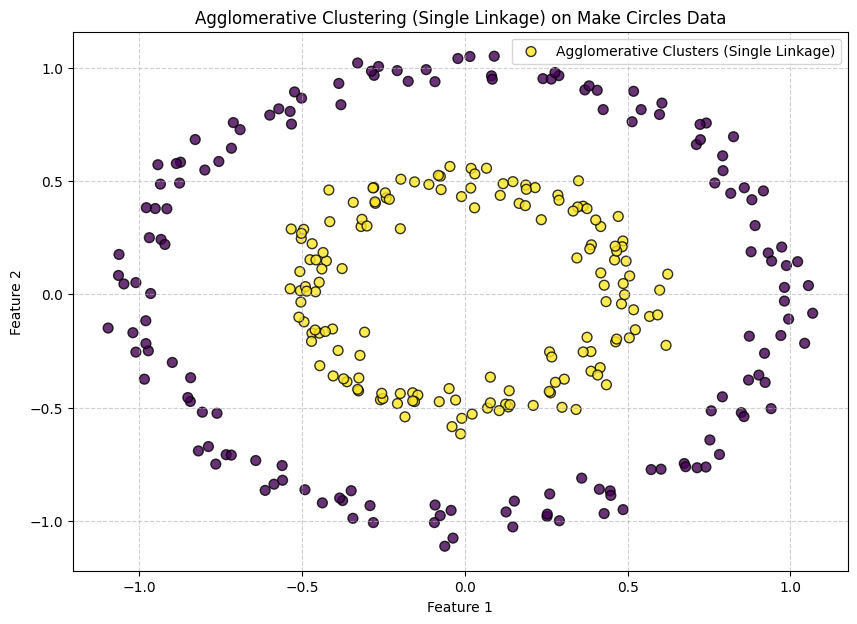

In [16]:
#Q35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# 1. Generate synthetic concentric circles data
n_samples = 300
# 'factor' controls the ratio of inner to outer circle radius
# 'noise' adds some randomness to the points
X, y_true = make_circles(n_samples=n_samples, noise=0.05, factor=0.5, random_state=42)

# 2. Apply Agglomerative Clustering with single linkage
# For two concentric circles, we expect two clusters.
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
predicted_labels = agg_clustering.fit_predict(X)

# 3. Plot the result
plt.figure(figsize=(10, 7))

# Scatter plot of data points, colored by their assigned cluster label
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, s=50, cmap='viridis', alpha=0.8,
            edgecolors='k', label='Agglomerative Clusters (Single Linkage)')

plt.title('Agglomerative Clustering (Single Linkage) on Make Circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('agg_clustering_single_linkage_circles.png')
print("Agglomerative Clustering with single linkage applied and visualization saved to agg_clustering_single_linkage_circles.png")

In [17]:
#Q36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)
import numpy as np
import pandas as pd # Used for convenient counting, but not strictly necessary
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data  # Features of the Wine dataset
# y_true = wine.target # True labels (for reference, not used in clustering)

# 2. Scale the data
# Scaling is crucial for distance-based algorithms like DBSCAN
# to ensure all features contribute equally.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point.
dbscan = DBSCAN(eps=1.0, min_samples=5) # Tune these parameters as needed
clusters = dbscan.fit_predict(X_scaled)

# 4. Count the number of clusters (excluding noise)
# DBSCAN assigns a label of -1 to noise points.

# Get unique labels assigned by DBSCAN
unique_labels = np.unique(clusters)

# Filter out the noise label (-1)
num_clusters = 0
for label in unique_labels:
    if label != -1:
        num_clusters += 1

print(f"Total samples: {len(X)}")
print(f"DBSCAN assigned labels: {unique_labels}")
print(f"Number of clusters found (excluding noise): {num_clusters}")

# Optional: Print the size of each cluster and noise points
print("\nDistribution of samples per label:")
label_counts = pd.Series(clusters).value_counts().sort_index()
print(label_counts)

# Identify noise count specifically
noise_count = label

Total samples: 178
DBSCAN assigned labels: [-1]
Number of clusters found (excluding noise): 0

Distribution of samples per label:
-1    178
dtype: int64


K-Means clustering applied and visualization with cluster centers saved to kmeans_blobs_with_centers.png


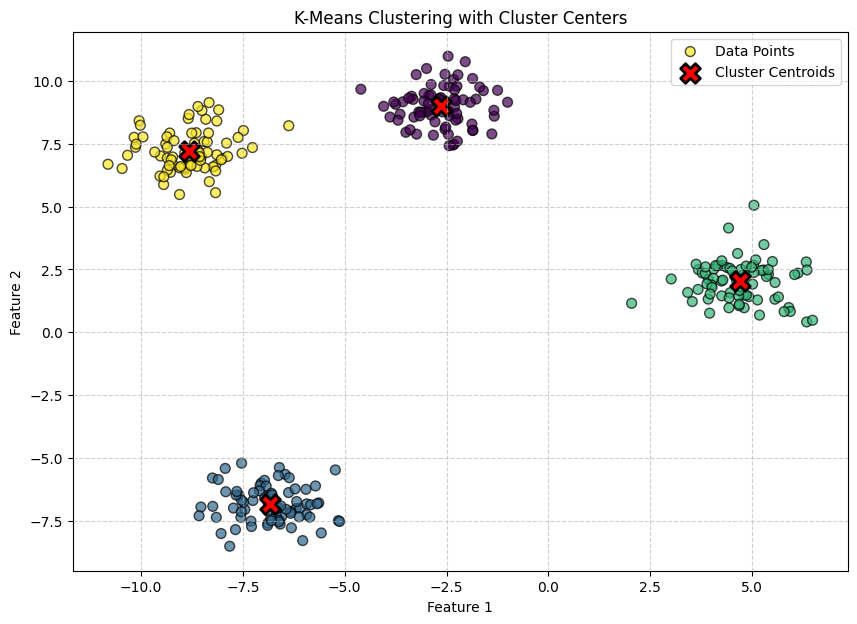

In [18]:
#Q37.  Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

# 1. Generate synthetic data
n_samples = 300
n_features = 2
n_centers = 4  # Let's create 4 distinct clusters
X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=0.8, random_state=42)

# 2. Apply K-Means clustering
# We set n_clusters to match the number of centers we generated
kmeans = KMeans(n_clusters=n_centers, random_state=42, n_init=10) # Set n_init explicitly
kmeans.fit(X)
cluster_labels = kmeans.labels_        # Labels assigned to each data point
centroids = kmeans.cluster_centers_    # Coordinates of the cluster centers

# 3. Plot the data points and cluster centers
plt.figure(figsize=(10, 7))

# Plot the data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis', alpha=0.7,
            edgecolors='k', label='Data Points')

# Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', edgecolors='black',
            linewidth=2, label='Cluster Centroids')

plt.title('K-Means Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('kmeans_blobs_with_centers.png')
print("K-Means clustering applied and visualization with cluster centers saved to kmeans_blobs_with_centers.png")

In [19]:
#Q38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise
import numpy as np
import pandas as pd # For convenient counting, though not strictly necessary
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # Features of the Iris dataset
# y_true = iris.target # True labels (for reference)

# 2. Scale the data
# Scaling is crucial for distance-based algorithms like DBSCAN
# to ensure all features contribute equally to distance calculations.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point.
dbscan = DBSCAN(eps=0.5, min_samples=5) # Adjust these parameters as needed
clusters = dbscan.fit_predict(X_scaled)

# 4. Print how many samples were identified as noise
# DBSCAN assigns a label of -1 to noise points.

noise_samples_count = np.sum(clusters == -1)

print(f"Total samples in Iris dataset: {len(X)}")
print(f"Number of samples identified as noise by DBSCAN: {noise_samples_count}")

# Optional: Print all unique labels and their counts for more detail
print("\nDistribution of samples per label (including noise -1):")
print(pd.Series(clusters).value_counts().sort_index())

Total samples in Iris dataset: 150
Number of samples identified as noise by DBSCAN: 34

Distribution of samples per label (including noise -1):
-1    34
 0    45
 1    71
dtype: int64


K-Means clustering applied to make_moons data and visualization saved to kmeans_make_moons_clustering.png


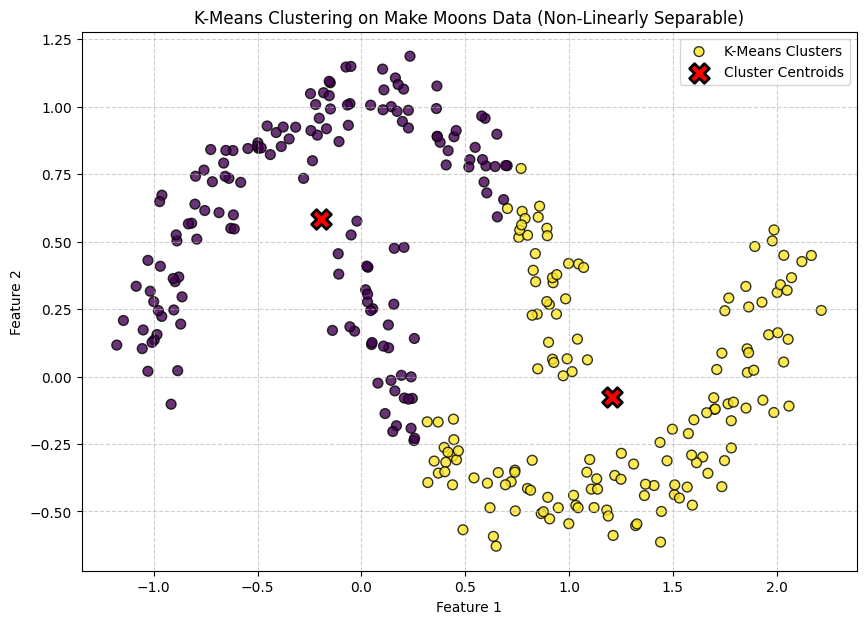

In [20]:
#Q39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import numpy as np

# 1. Generate synthetic non-linearly separable data (make_moons)
n_samples = 300
# 'noise' adds some randomness to the points
X, y_true = make_moons(n_samples=n_samples, noise=0.08, random_state=42)

# 2. Apply K-Means clustering
# We expect 2 clusters from make_moons data
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # Set n_init explicitly
kmeans.fit(X)
cluster_labels = kmeans.labels_        # Labels assigned to each data point
centroids = kmeans.cluster_centers_    # Coordinates of the cluster centers

# 3. Visualize the clustering result
plt.figure(figsize=(10, 7))

# Plot the data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis', alpha=0.8,
            edgecolors='k', label='K-Means Clusters')

# Optionally, plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', edgecolors='black',
            linewidth=2, label='Cluster Centroids')

plt.title('K-Means Clustering on Make Moons Data (Non-Linearly Separable)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('kmeans_make_moons_clustering.png')
print("K-Means clustering applied to make_moons data and visualization saved to kmeans_make_moons_clustering.png")

Original data shape: (1797, 64)
Reduced data shape (PCA to 3D): (1797, 3)
Digits dataset loaded, PCA to 3D applied, K-Means clustered, and visualization saved to kmeans_digits_pca_3d_clustering.png


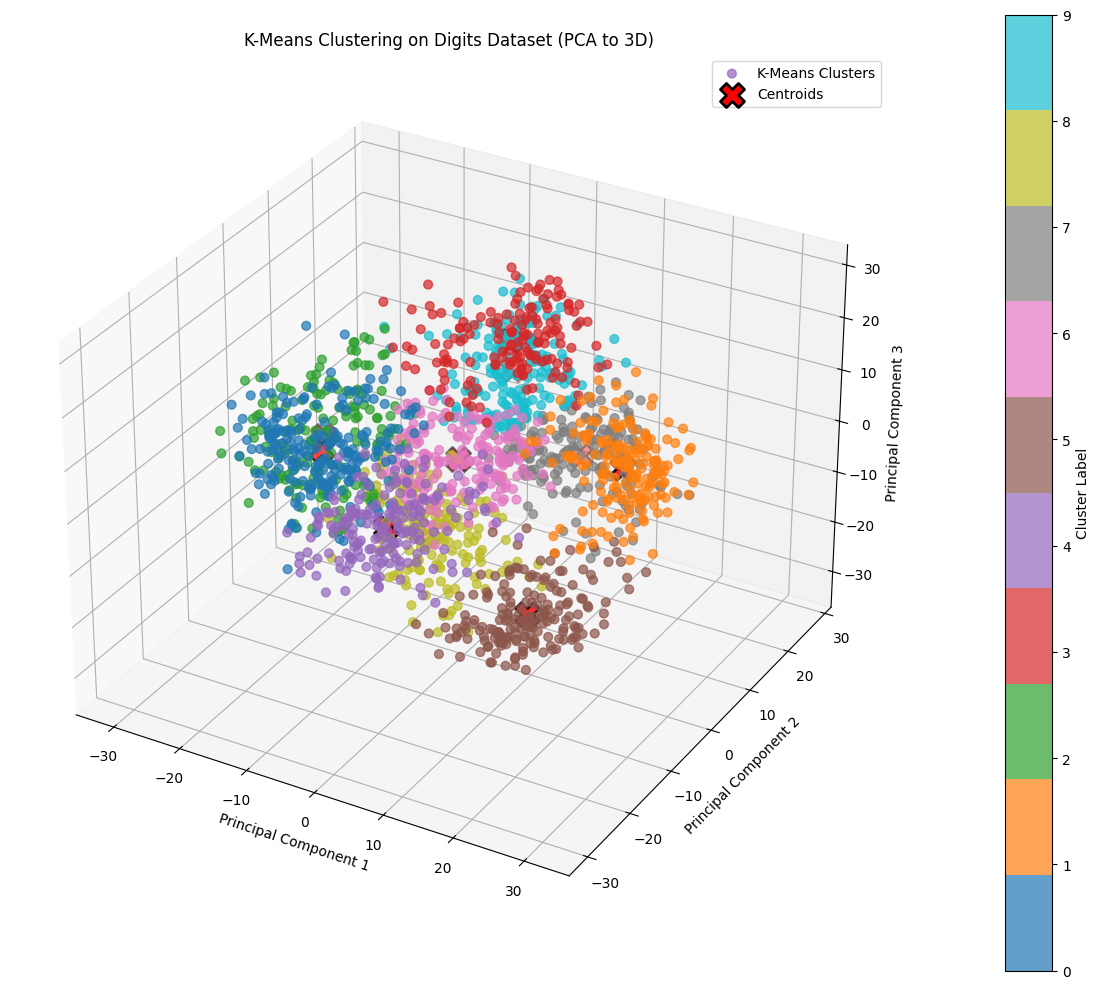

In [21]:
#Q40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data  # The image data (64 features per image)
y_true = digits.target # The actual digit (0-9) - for reference

print(f"Original data shape: {X.shape}") # (1797 samples, 64 features)

# 2. Reduce dimensionality to 3D using PCA
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

print(f"Reduced data shape (PCA to 3D): {X_pca.shape}") # (1797 samples, 3 features)

# 3. Apply K-Means clustering
# The Digits dataset has 10 classes (digits 0-9), so we'll use 10 clusters.
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 4. Visualize clusters with a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points, colored by K-Means cluster labels
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=cluster_labels, cmap='tab10', s=40, alpha=0.7, label='K-Means Clusters')

# Plot the cluster centroids in 3D
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           s=300, c='red', marker='X', edgecolors='black', linewidth=2, label='Centroids')

ax.set_title('K-Means Clustering on Digits Dataset (PCA to 3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster Label')

plt.legend()
plt.tight_layout()
plt.savefig('kmeans_digits_pca_3d_clustering.png')
print("Digits dataset loaded, PCA to 3D applied, K-Means clustered, and visualization saved to kmeans_digits_pca_3d_clustering.png")

In [22]:
#Q41.  Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 1. Generate synthetic blobs with 5 centers
n_samples = 500
n_features = 2
n_centers = 5 # Number of distinct centers
X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=1.0, random_state=42)

# 2. Apply K-Means clustering
# We set n_clusters to match the number of centers we generated
kmeans = KMeans(n_clusters=n_centers, random_state=42, n_init=10) # Set n_init explicitly
kmeans.fit(X)
cluster_labels = kmeans.labels_        # Labels assigned to each data point

# 3. Evaluate the clustering using silhouette_score
# The silhouette_score ranges from -1 to 1, where:
#   1 indicates perfectly distinct and well-separated clusters.
#   0 indicates overlapping clusters.
#   -1 indicates data points are assigned to the wrong clusters.
silhouette_avg = silhouette_score(X, cluster_labels)

print(f"K-Means clustering applied with {n_centers} clusters.")
print(f"Silhouette Score for the clustering: {silhouette_avg:.4f}")

K-Means clustering applied with 5 clusters.
Silhouette Score for the clustering: 0.6786


Original data shape: (569, 30)
Reduced data shape (PCA to 2D): (569, 2)
Breast Cancer dataset loaded, PCA applied, Agglomerative Clustering performed, and visualization saved to agg_clustering_breast_cancer_pca_2d.png


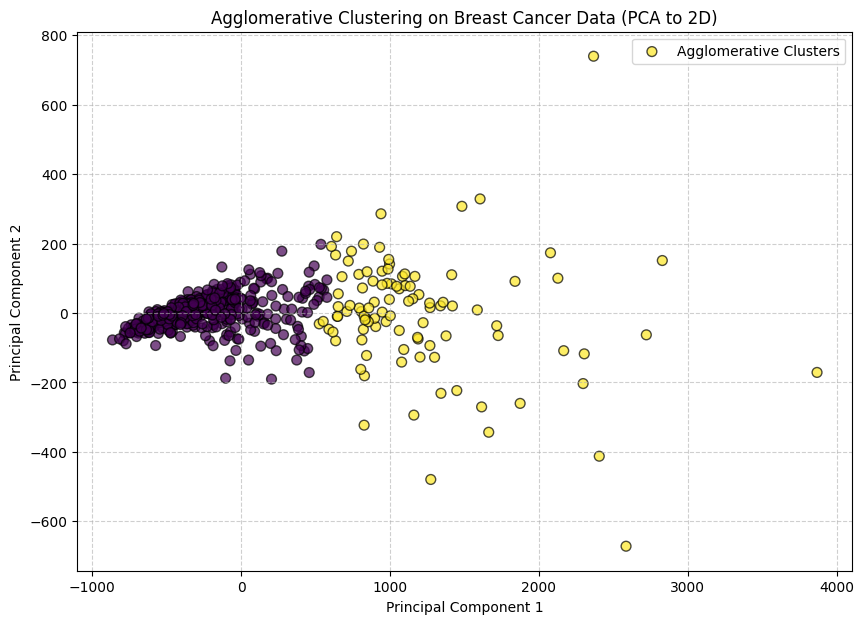

In [23]:
#Q42.   Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# 1. Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data  # Features of the Breast Cancer dataset
y_true = breast_cancer.target # True labels (0: malignant, 1: benign - for reference)

print(f"Original data shape: {X.shape}") # (569 samples, 30 features)

# 2. Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

print(f"Reduced data shape (PCA to 2D): {X_pca.shape}") # (569 samples, 2 features)

# 3. Apply Agglomerative Clustering
# The Breast Cancer dataset typically has 2 classes (malignant/benign),
# so we'll aim for 2 clusters.
n_clusters = 2
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
predicted_labels = agg_clustering.fit_predict(X_pca)

# 4. Visualize in 2D
plt.figure(figsize=(10, 7))

# Scatter plot of data points, colored by Agglomerative Clustering labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, s=50, cmap='viridis', alpha=0.7,
            edgecolors='k', label='Agglomerative Clusters')

plt.title('Agglomerative Clustering on Breast Cancer Data (PCA to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('agg_clustering_breast_cancer_pca_2d.png')
print("Breast Cancer dataset loaded, PCA applied, Agglomerative Clustering performed, and visualization saved to agg_clustering_breast_cancer_pca_2d.png")

K-Means and DBSCAN clustering results on circular data visualized side-by-side and saved to kmeans_dbscan_circular_comparison.png


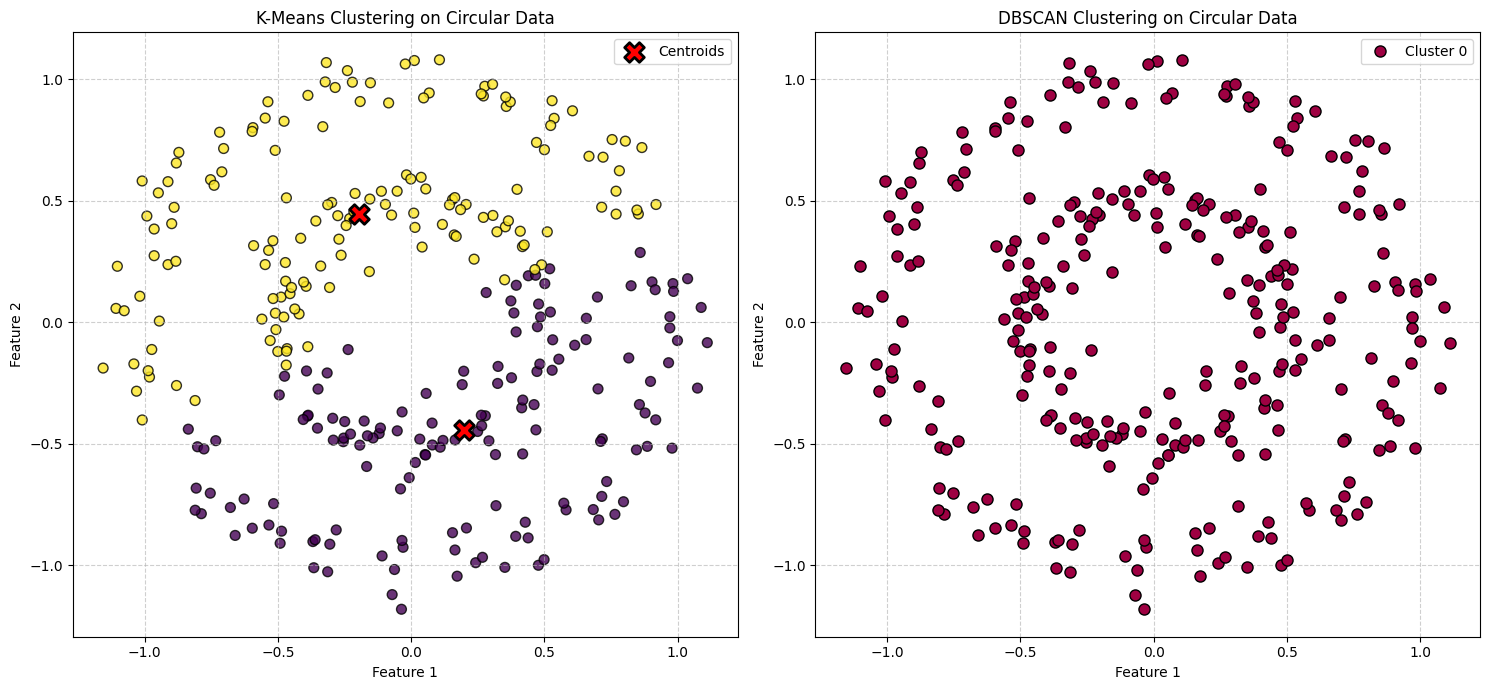

In [24]:
#Q43.  Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN

# 1. Generate noisy circular data
n_samples = 300
noise_level = 0.08 # Adjust this to make it more or less noisy
X, y_true = make_circles(n_samples=n_samples, noise=noise_level, factor=0.5, random_state=42)

# 2. Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # 2 clusters for 2 circles
kmeans_labels = kmeans.fit_predict(X)

# 3. Apply DBSCAN clustering
# These parameters are typically good for make_circles data;
# you might need to tune them based on your 'noise_level'.
dbscan = DBSCAN(eps=0.2, min_samples=5) # eps: neighborhood radius, min_samples: min points for core
dbscan_labels = dbscan.fit_predict(X)

# 4. Visualize clustering results side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 7)) # 1 row, 2 columns for subplots

# --- Plot K-Means Results ---
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=50, cmap='viridis', alpha=0.8, edgecolors='k')
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=200, c='red', marker='X', edgecolors='black', linewidth=2, label='Centroids')
axes[0].set_title('K-Means Clustering on Circular Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# --- Plot DBSCAN Results ---
# Handle noise points (-1 label) explicitly
unique_dbscan_labels = np.unique(dbscan_labels)
# Using a colormap that can handle many distinct colors if DBSCAN finds more than 2
dbscan_colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_dbscan_labels))]

for k, col in zip(unique_dbscan_labels, dbscan_colors):
    if k == -1:
        # Black color for noise points
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan_labels == k)

    axes[1].plot(X[class_member_mask, 0], X[class_member_mask, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=8 if k != -1 else 6,
                 label=f'Cluster {k}' if k != -1 else 'Noise')

axes[1].set_title('DBSCAN Clustering on Circular Data')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('kmeans_dbscan_circular_comparison.png')
print("K-Means and DBSCAN clustering results on circular data visualized side-by-side and saved to kmeans_dbscan_circular_comparison.png")

Average Silhouette Score: 0.5528
Silhouette plot for Iris dataset after KMeans clustering saved to iris_kmeans_silhouette_plot.png


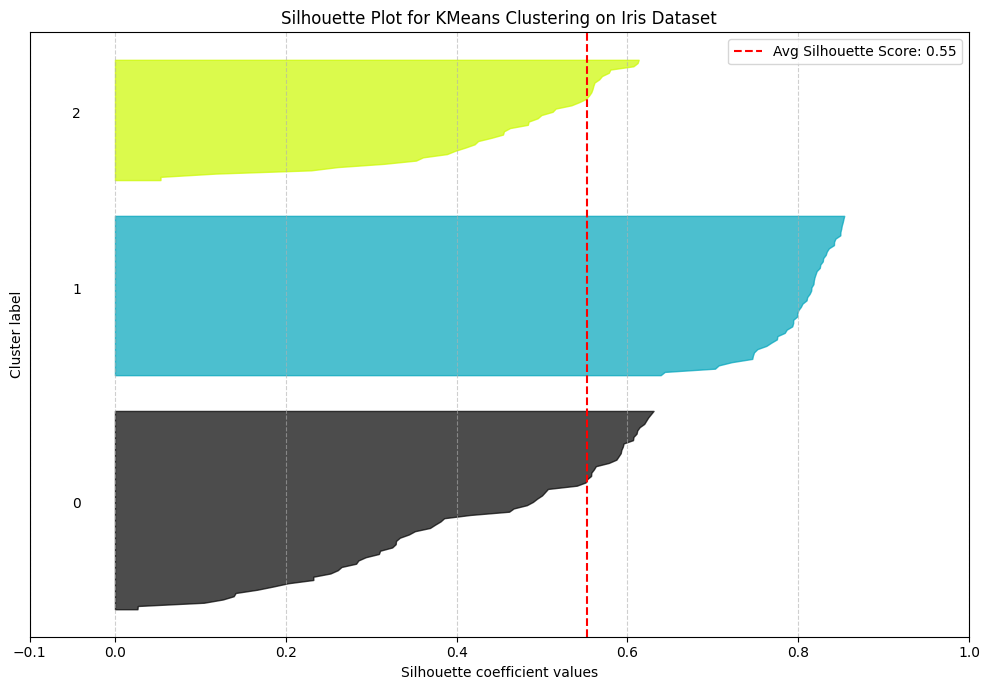

In [25]:
#Q44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target # True labels (for reference)

# 2. Apply K-Means clustering
n_clusters = 3 # Iris dataset has 3 known classes
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# 3. Calculate Silhouette Coefficient for each sample
# silhouette_samples returns the silhouette coefficient for each sample.
silhouette_per_sample = silhouette_samples(X, cluster_labels)
average_silhouette_score = silhouette_score(X, cluster_labels)

print(f"Average Silhouette Score: {average_silhouette_score:.4f}")

# 4. Plot the Silhouette Coefficient for each sample
fig, ax1 = plt.subplots(1, 1, figsize=(10, 7))

y_lower = 10 # Starting point for plotting the first silhouette bar
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = \
        silhouette_per_sample[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10 # 10 for the 0 samples

ax1.set_title("Silhouette Plot for KMeans Clustering on Iris Dataset")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=average_silhouette_score, color="red", linestyle="--",
            label=f'Avg Silhouette Score: {average_silhouette_score:.2f}')
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax1.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('iris_kmeans_silhouette_plot.png')
print("Silhouette plot for Iris dataset after KMeans clustering saved to iris_kmeans_silhouette_plot.png")

Agglomerative Clustering with average linkage applied and visualization saved to agg_clustering_average_linkage_blobs.png


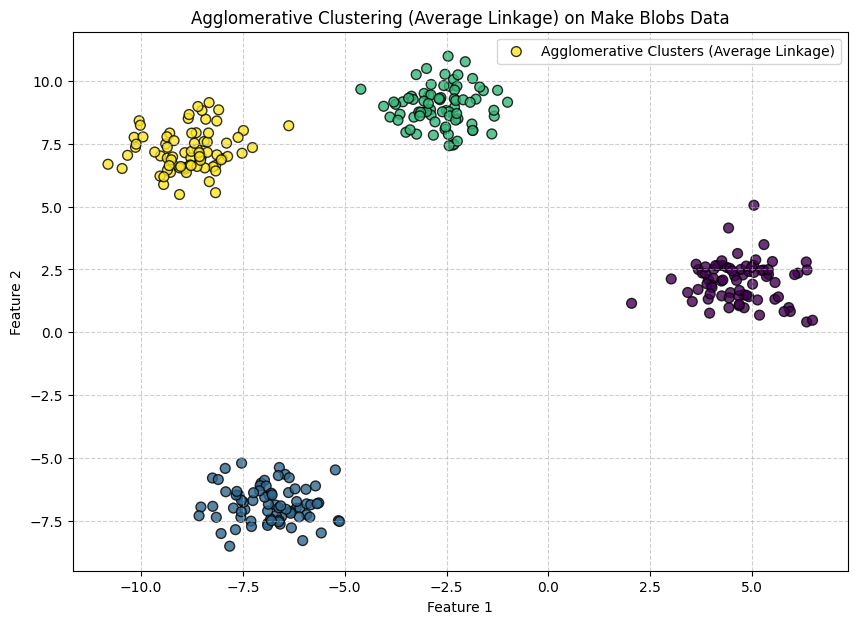

In [26]:
#Q45.  Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# 1. Generate synthetic data
n_samples = 300
n_features = 2
n_centers = 4 # Let's create 4 distinct blobs
X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=0.8, random_state=42)

# 2. Apply Agglomerative Clustering with average linkage
# We aim for the same number of clusters as generated (4 in this case)
agg_clustering = AgglomerativeClustering(n_clusters=n_centers, linkage='average')
predicted_labels = agg_clustering.fit_predict(X)

# 3. Visualize clusters
plt.figure(figsize=(10, 7))

# Scatter plot of data points, colored by their assigned cluster label
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, s=50, cmap='viridis', alpha=0.8,
            edgecolors='k', label='Agglomerative Clusters (Average Linkage)')

plt.title('Agglomerative Clustering (Average Linkage) on Make Blobs Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('agg_clustering_average_linkage_blobs.png')
print("Agglomerative Clustering with average linkage applied and visualization saved to agg_clustering_average_linkage_blobs.png")

Generating Seaborn pairplot for the first 4 features with K-Means clusters...
Pairplot visualization saved to wine_kmeans_pairplot_first4features.png


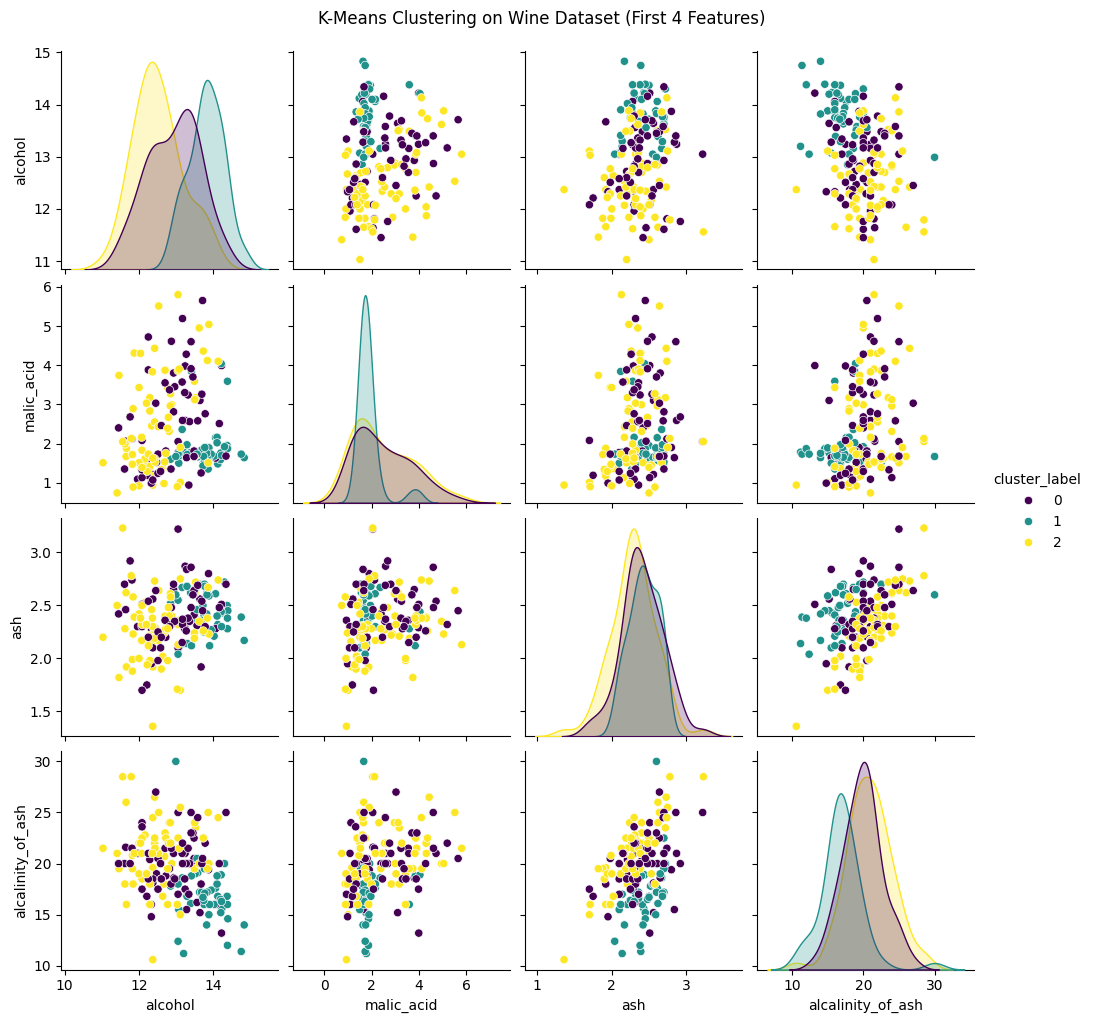

In [27]:
#Q46.  Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import numpy as np

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data  # Features (numerical data)
feature_names = wine.feature_names # Names of the features
y_true = wine.target # True labels (0, 1, 2 for the three cultivars)

# 2. Apply K-Means clustering
# The Wine dataset has 3 inherent classes, so we'll use 3 clusters.
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
kmeans.fit(X)
cluster_labels = kmeans.labels_ # Get the cluster assignments for each sample

# 3. Prepare data for Seaborn pairplot
# Create a DataFrame for easier plotting with feature names
df_wine = pd.DataFrame(X, columns=feature_names)

# Add the K-Means cluster labels to the DataFrame
df_wine['cluster_label'] = cluster_labels

# Select only the first 4 features plus the cluster label for the pairplot
# (Seaborn pairplot can be slow with many features)
df_subset = df_wine.iloc[:, [0, 1, 2, 3, -1]] # Select first 4 feature columns and the last column (cluster_label)
subset_feature_names = df_wine.columns[[0,1,2,3]].tolist()
subset_feature_names.append('cluster_label')
df_subset.columns = subset_feature_names


# 4. Visualize cluster assignments in a seaborn pairplot
print("Generating Seaborn pairplot for the first 4 features with K-Means clusters...")
sns.pairplot(df_subset, hue='cluster_label', palette='viridis', diag_kind='kde')
plt.suptitle('K-Means Clustering on Wine Dataset (First 4 Features)', y=1.02) # Add a main title
plt.savefig('wine_kmeans_pairplot_first4features.png')
print("Pairplot visualization saved to wine_kmeans_pairplot_first4features.png")

In [28]:
#Q47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# 1. Generate noisy blobs data
n_samples = 500
n_features = 2
n_centers = 3 # Number of clusters
cluster_std = 1.2 # Increased standard deviation to make blobs noisy/overlapping
X, y_true = make_blobs(n_samples=n_samples, n_features=n_features,
                       centers=n_centers, cluster_std=cluster_std, random_state=42)

# 2. Apply DBSCAN to identify clusters and noise points
# Note: These parameters (eps, min_samples) are crucial for DBSCAN and
# often need tuning based on the density and noise level of your specific data.
# For noisy blobs, a careful selection is needed to distinguish clusters from noise.
dbscan = DBSCAN(eps=0.8, min_samples=5) # Example parameters, adjust as needed
clusters = dbscan.fit_predict(X)

# 3. Print the count of clusters and noise points
unique_labels = np.unique(clusters)

# Count of noise points
noise_count = np.sum(clusters == -1)

# Count of actual clusters (excluding noise)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print(f"Total samples: {len(X)}")
print(f"DBSCAN identified {num_clusters} clusters and {noise_count} noise points.")

print("\nDetailed breakdown of samples per label:")
# Using pandas Series.value_counts() for a clear breakdown
label_counts = pd.Series(clusters).value_counts().sort_index()
print(label_counts)

if -1 in label_counts.index:
    print(f"  (Label -1 represents noise points)")

Total samples: 500
DBSCAN identified 3 clusters and 21 noise points.

Detailed breakdown of samples per label:
-1     21
 0    159
 1    158
 2    162
dtype: int64
  (Label -1 represents noise points)


Original data shape: (1797, 64)
Applying t-SNE for dimensionality reduction (this may take a moment)...


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE finished in 7.01 seconds.
Reduced data shape (t-SNE): (1797, 2)
Digits dataset loaded, t-SNE applied, Agglomerative Clustering performed, and visualization saved to agg_clustering_digits_tsne_clustering.png


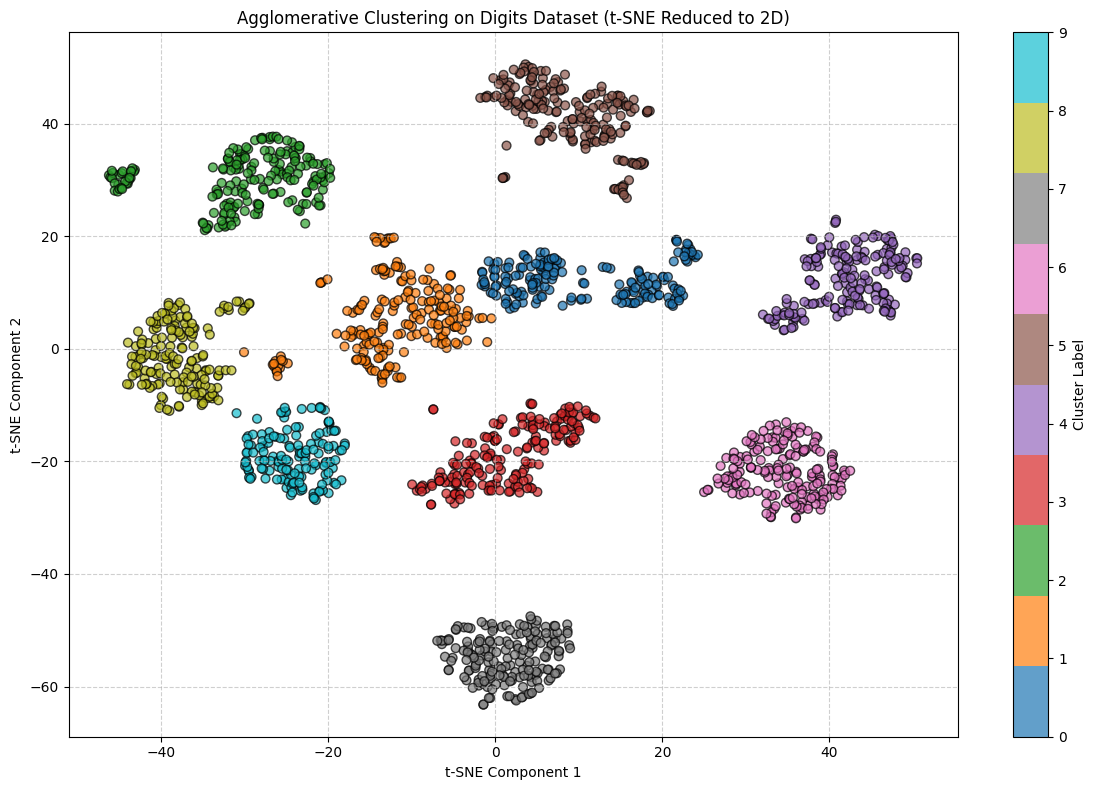

In [29]:
#Q48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import time

# 1. Load the Digits dataset
digits = load_digits()
X = digits.data  # The image data (64 features per image)
y_true = digits.target # The actual digit (0-9) - for reference

print(f"Original data shape: {X.shape}") # (1797 samples, 64 features)

# 2. Reduce dimensionality to 2D using t-SNE
print("Applying t-SNE for dimensionality reduction (this may take a moment)...")
start_time = time.time()
# perplexity and n_iter are common parameters for t-SNE;
# they often need tuning for optimal visualization.
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)
end_time = time.time()
print(f"t-SNE finished in {end_time - start_time:.2f} seconds.")

print(f"Reduced data shape (t-SNE): {X_tsne.shape}") # (1797 samples, 2 features)

# 3. Apply Agglomerative Clustering
# The Digits dataset has 10 classes (digits 0-9), so we'll aim for 10 clusters.
n_clusters = 10
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
predicted_labels = agg_clustering.fit_predict(X_tsne)

# 4. Plot the clusters
plt.figure(figsize=(12, 8))

# Scatter plot of data points, colored by Agglomerative Clustering labels
# Using 'tab10' colormap which has 10 distinct colors for the 10 clusters.
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=predicted_labels, s=40, cmap='tab10', alpha=0.7,
            edgecolors='k', label='Agglomerative Clusters')

plt.title('Agglomerative Clustering on Digits Dataset (t-SNE Reduced to 2D)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('agg_clustering_digits_tsne_clustering.png')
print("Digits dataset loaded, t-SNE applied, Agglomerative Clustering performed, and visualization saved to agg_clustering_digits_tsne_clustering.png")